In [2]:
import pandas as pd

In [3]:
# df=pd.read_csv("final_dataset.csv")
df=pd.read_csv("data/final_dataset.csv")
df.head(2)

,Unnamed: 0,VPN,Date,Depart,Arrivé,Prix,Temps de vol,Heure de départ,Heure d'arrivé,Nombre d'escales,Compagnies,PIB par habitant ($)
0,0,Cambodge,30/01/2023,"Aéroport de Paris Charles de Gaulle, Paris, Fr...","Aéroport Kingsford Smith de Sydney, Sydney, No...",908 €,33h 0m,12:30,07:30,2 escales,Plusieurs compagnies,4000
1,1,Cambodge,30/01/2023,"Aéroport de Paris Charles de Gaulle, Paris, Fr...","Aéroport Kingsford Smith de Sydney, Sydney, No...",1 537 €,25h 10m,21:00,08:10,1 escale,Air India,4000


In [4]:
df["Prix"]=df["Prix"].apply(lambda x :int(x.replace("€","").replace(" ","").strip()))
df.loc[1,"Prix"]

1537

In [5]:
test=df.groupby(by=['Depart', 'Arrivé','Heure de départ', "Heure d'arrivé",'Date',"Compagnies","Nombre d'escales","Temps de vol"])["Prix","VPN"].agg(lambda x: x.tolist()).reset_index()   

C:\Users\romai\AppData\Local\Temp\ipykernel_23856\3461658687.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test=df.groupby(by=['Depart', 'Arrivé','Heure de départ', "Heure d'arrivé",'Date',"Compagnies","Nombre d'escales","Temps de vol"])["Prix","VPN"].agg(lambda x: x.tolist()).reset_index()


In [6]:
def __from_list_to_dico__(x):
    dico={}
    for i in x:
        if i not in dico:
            dico[i]=1
        else:
            dico[i]+=1
    return dico

test["dico_Prix"]=None
test["dico_Prix"]=test["Prix"].apply(lambda x :__from_list_to_dico__(x))


In [7]:


def __dico_VPN_Prix__(x):
    return dict(zip(x["VPN"],x["Prix"] )) 

test["dico_VPN_prix"]=None
test["dico_VPN_prix"]=test.apply(lambda x:__dico_VPN_Prix__(x),axis=1 )

In [8]:
from statistics import mean
test["prix_moyen_trajet"]=None
test["prix_moyen_trajet"]=test["dico_VPN_prix"].apply(lambda x:round(mean([i for i in x.values()]),2) )

In [9]:
from statistics import median
test["prix_median_trajet"]=None
test["prix_median_trajet"]=test["dico_VPN_prix"].apply(lambda x:round(median([i for i in x.values()]),2) )

# Verifier que on a le meme prix pour tous les vols si on a la variable plusieurs compagnies

In [10]:
def __is_same_price__(x):
    verif=False
    if len(x)==1 or (len(x)==2 and "57 €" in x.keys()) :
        verif= True
    return verif
    

test["is_same_price"]=None
test["is_same_price"]=test["dico_Prix"].apply(lambda x :__is_same_price__(x))


In [11]:

test[test.Compagnies=="Plusieurs compagnies"].groupby("is_same_price").count()

,Depart,Arrivé,Heure de départ,Heure d'arrivé,Date,Compagnies,Nombre d'escales,Temps de vol,Prix,VPN,dico_Prix,dico_VPN_prix,prix_moyen_trajet,prix_median_trajet
is_same_price,,,,,,,,,,,,,,
False,98,98,98,98,98,98,98,98,98,98,98,98,98,98
True,81,81,81,81,81,81,81,81,81,81,81,81,81,81


In [12]:
test.groupby(["is_same_price","Compagnies"]).count()

Depart  Arrivé  Heure de départ  \
is_same_price Compagnies                                              
False         Air Arabia                 1       1                1   
              Air Canada                 5       5                5   
              Air France                 4       4                4   
              Air India                  4       4                4   
              China Airlines             1       1                1   
              Delta Air Lines            4       4                4   
              Egyptair                   2       2                2   
              Emirates                   2       2                2   
              Ethiopian Airlines         2       2                2   
              Etihad Airways             7       7                7   
              Flynas                     3       3                3   
              Gulf Air                   1       1                1   
              Iberia                     4       4                4   
              JetBlue                   10      10               10   
              Korean Air                 1       1                1   
              LOT Polish Airlines        5       5                5   
              Lufthansa                  9       9                9   
              Oman Air                   3       3                3   
              Plusieurs compagnies      98      98               98   
              Qatar Airways              2       2                2   
              Royal Air Maroc            1       1                1   
              Ryanair                   10      10               10   
              Saudia                     1       1                1   
              Singapore Airlines         2       2                2   
              Swiss                      3       3                3   
              TAP Air Portugal           7       7                7   
              Thai Airways               1       1                1   
              Turkish Airlines           1       1                1   
              Vueling                    4       4                4   
True          Air Arabia                 1       1                1   
              Air Baltic                 3       3                3   
              Air Canada                 1       1                1   
              Air France                 3       3                3   
              Brussels Airlines          1       1                1   
              Delta Air Lines           12      12               12   
              Egyptair                   1       1                1   
              Etihad Airways             2       2                2   
              Finnair                    1       1                1   
              Flynas                     3       3                3   
              Gulf Air                   1       1                1   
              Iberia                     3       3                3   
              Iberia Express             6       6                6   
              JetBlue                    9       9                9   
              KLM                        2       2                2   
              Korean Air                 1       1                1   
              LOT Polish Airlines        3       3                3   
              Lufthansa                  1       1                1   
              Plusieurs compagnies      81      81               81   
              Qatar Airways              4       4                4   
              Ryanair                   15      15               15   
              Saudia                     1       1                1   
              Swiss                      1       1                1   
              TAP Air Portugal           6       6                6   
              Thai Airways               2       2                2   
              Vueling                    3       3          

# Calcul de la différence par pays 

## Moyenne

In [13]:
df_calcul=test.copy()
df_calcul=df_calcul[df_calcul["is_same_price"]==False]
df_calcul.reset_index(inplace=True,drop=True)

In [14]:
df.VPN.unique()

dico_VPN_ecartMoyenne={}

for i in df.VPN.unique():
    dico_VPN_ecartMoyenne[i]=0
dico_VPN_ecartMoyenne


for l in range(len(df_calcul)):
    for k,v in df_calcul.loc[l,"dico_VPN_prix"].items():
        dico_VPN_ecartMoyenne[k]+=(v-df_calcul.loc[l,"prix_moyen_trajet"])

for k,v in dico_VPN_ecartMoyenne.items():
    dico_VPN_ecartMoyenne[k]=round(dico_VPN_ecartMoyenne[k],2)

dico_VPN_ecartMoyenne

{'Cambodge': -29.31,
 'Bangladesh': 56.17,
 'Inde': 220.68,
 'Moldavie': 162.5,
 'Philippines': 218.29,
 'Liechtenstein': -23.26,
 'Luxembourg': -186.86,
 'Macao': -241.49,
 'Monaco': -268.43,
 'Qatar': 91.84}

In [15]:
dico_VPN_ecartMoyenne_pondere={}

for i in df.VPN.unique():
    dico_VPN_ecartMoyenne_pondere[i]=0
dico_VPN_ecartMoyenne_pondere

for k,v in dico_VPN_ecartMoyenne.items():
    dico_VPN_ecartMoyenne_pondere[k]=round(dico_VPN_ecartMoyenne[k]/len(df_calcul),2)


dico_VPN_ecartMoyenne_pondere

{'Cambodge': -0.15,
 'Bangladesh': 0.28,
 'Inde': 1.11,
 'Moldavie': 0.82,
 'Philippines': 1.1,
 'Liechtenstein': -0.12,
 'Luxembourg': -0.94,
 'Macao': -1.22,
 'Monaco': -1.36,
 'Qatar': 0.46}

c:\Users\romai\anaconda3\envs\MLDAta\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<BarContainer object of 10 artists>

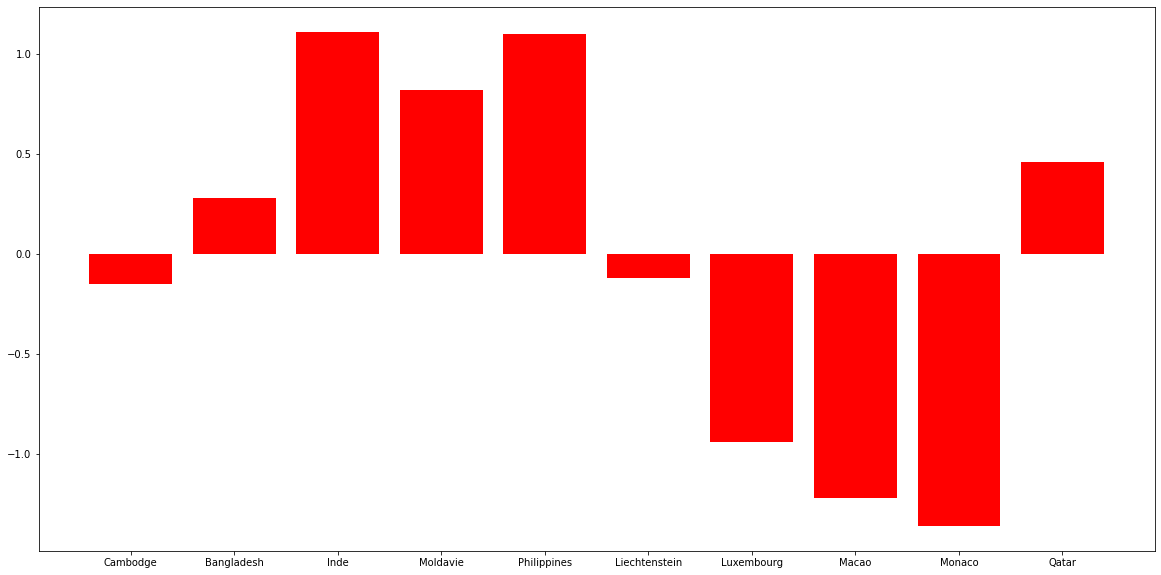

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot dico_VPN_ecartMoyenne_pondere and dico_VPN_ecartMoyenne
plt.figure(figsize=(20,10))
# plt.bar(dico_VPN_ecartMoyenne.keys(),dico_VPN_ecartMoyenne.values(),color="blue",label="ecart moyen pondéré")
plt.bar(dico_VPN_ecartMoyenne_pondere.keys(),dico_VPN_ecartMoyenne_pondere.values(),color="red",label="ecart moyen")


## Mediane

In [17]:
dico_VPN_ecartMedianne={}

for i in df.VPN.unique():
    dico_VPN_ecartMedianne[i]=0
dico_VPN_ecartMedianne


for l in range(len(df_calcul)):
    for k,v in df_calcul.loc[l,"dico_VPN_prix"].items():
        dico_VPN_ecartMedianne[k]+=(v-df_calcul.loc[l,"prix_median_trajet"])

for k,v in dico_VPN_ecartMedianne.items():
    dico_VPN_ecartMedianne[k]=round(dico_VPN_ecartMedianne[k],2)

dico_VPN_ecartMedianne

{'Cambodge': -80.5,
 'Bangladesh': 44.5,
 'Inde': 167.5,
 'Moldavie': 109.0,
 'Philippines': 147.5,
 'Liechtenstein': -33.5,
 'Luxembourg': -177.0,
 'Macao': -214.0,
 'Monaco': -258.0,
 'Qatar': 78.5}

In [18]:
dico_VPN_ecartMedianne_pondere={}

for i in df.VPN.unique():
    dico_VPN_ecartMedianne_pondere[i]=0
dico_VPN_ecartMoyenne_pondere

for k,v in dico_VPN_ecartMedianne.items():
    dico_VPN_ecartMedianne_pondere[k]=round(dico_VPN_ecartMedianne[k]/len(df_calcul),2)


dico_VPN_ecartMedianne_pondere

{'Cambodge': -0.41,
 'Bangladesh': 0.22,
 'Inde': 0.85,
 'Moldavie': 0.55,
 'Philippines': 0.74,
 'Liechtenstein': -0.17,
 'Luxembourg': -0.89,
 'Macao': -1.08,
 'Monaco': -1.3,
 'Qatar': 0.4}

## Plot

In [19]:
Pays=df[["VPN","PIB par habitant ($)"]].drop_duplicates()
Pays.reset_index(inplace=True,drop=True)

In [20]:
dico_PIB={}

for i in range(len(Pays)):
    dico_PIB[Pays.loc[i,"VPN"]]=Pays.loc[i,"PIB par habitant ($)"]
dico_PIB

{'Cambodge': 4000,
 'Bangladesh': 4200,
 'Inde': 7200,
 'Moldavie': 5700,
 'Philippines': 8200,
 'Liechtenstein': 139100,
 'Luxembourg': 109100,
 'Macao': 114400,
 'Monaco': 115700,
 'Qatar': 124900}

In [24]:
dico_PIB
dico_PIB=dict(sorted(dico_PIB.items(), key=lambda item: item[1]))

{'Cambodge': 4000,
 'Bangladesh': 4200,
 'Moldavie': 5700,
 'Inde': 7200,
 'Philippines': 8200,
 'Luxembourg': 109100,
 'Macao': 114400,
 'Monaco': 115700,
 'Qatar': 124900,
 'Liechtenstein': 139100}

In [36]:
liste_Moyenne=[]
liste_MoyennePondere=[]
liste_Median=[]
liste_MedianPondere=[]

lise_Pays=[]
liste_PIB=[]


for k in dico_PIB.keys():
    liste_Moyenne.append(dico_VPN_ecartMoyenne[k])
    liste_MoyennePondere.append(dico_VPN_ecartMoyenne_pondere[k])
    liste_Median.append(dico_VPN_ecartMedianne[k])
    liste_MedianPondere.append(dico_VPN_ecartMedianne_pondere[k])
    lise_Pays.append(k)
    liste_PIB.append(dico_PIB[k])

liste_PIB

[4000, 4200, 5700, 7200, 8200, 109100, 114400, 115700, 124900, 139100]

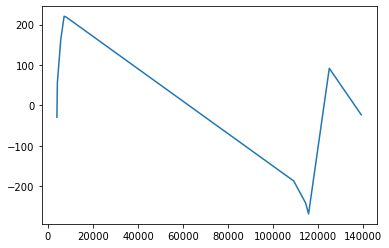

In [37]:
import matplotlib.pyplot as plt 

plt.plot(liste_PIB,liste_Moyenne)

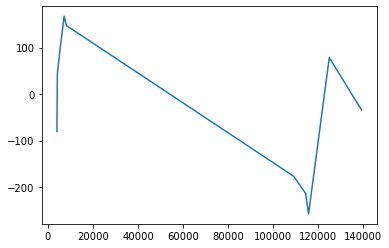

In [38]:
plt.plot(liste_PIB,liste_Median)